In [1]:
import torch
from torch import nn
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
print(torch.__version__)
from pathlib import Path

2.0.1+cpu


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "clouds"
image_path

WindowsPath('data/clouds')

In [4]:
import os
def walk_through_dir(dir_path):
    """Walks through the directory path and terurns its contents"""
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")
        
walk_through_dir(image_path)

There are 2 directories and 1 images in 'data\clouds'
There are 7 directories and 0 images in 'data\clouds\clouds_test'
There are 0 directories and 77 images in 'data\clouds\clouds_test\cirriform clouds'
There are 0 directories and 64 images in 'data\clouds\clouds_test\clear sky'
There are 0 directories and 11 images in 'data\clouds\clouds_test\cumulonimbus clouds'
There are 0 directories and 120 images in 'data\clouds\clouds_test\cumulus clouds'
There are 0 directories and 103 images in 'data\clouds\clouds_test\high cumuliform clouds'
There are 0 directories and 40 images in 'data\clouds\clouds_test\stratiform clouds'
There are 0 directories and 71 images in 'data\clouds\clouds_test\stratocumulus clouds'
There are 7 directories and 0 images in 'data\clouds\clouds_train'
There are 0 directories and 66 images in 'data\clouds\clouds_train\cirriform clouds'
There are 0 directories and 60 images in 'data\clouds\clouds_train\clear sky'
There are 0 directories and 14 images in 'data\clouds\c

In [5]:
# setup train and test path
train_dir = image_path / 'clouds_train'
test_dir = image_path / 'clouds_test'
train_dir, test_dir

(WindowsPath('data/clouds/clouds_train'),
 WindowsPath('data/clouds/clouds_test'))

In [6]:
image_path

WindowsPath('data/clouds')

In [7]:
len(list(image_path.glob("*/*/*.jpg")))

960

In [8]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))

# pick a random image
random_image_path = random.choice(image_path_list)
random_image_path

WindowsPath('data/clouds/clouds_test/stratocumulus clouds/c854805fc3aae4b671e77ae335fb3ed9.jpg')

In [9]:
image_class = random_image_path.parent.stem
image_class

'stratocumulus clouds'

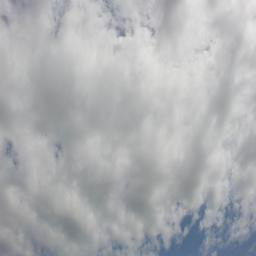

In [10]:
# open inage
img = Image.open(random_image_path)
img

Random image path: data\clouds\clouds_test\stratocumulus clouds\c854805fc3aae4b671e77ae335fb3ed9.jpg
Image class: stratocumulus clouds
Image height: 256
Image width: 256


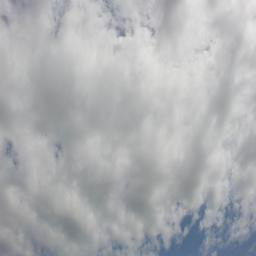

In [11]:
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
# print(f"Image shape: {img.shape}")
img

Text(0.5, 1.0, 'Image class: stratocumulus clouds | Image shape: (256, 256, 3) -> H,W,C')

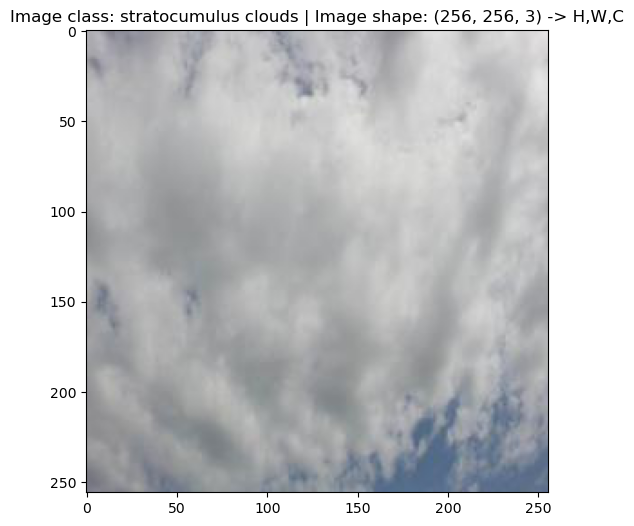

In [12]:
import matplotlib.pyplot as plt
import numpy as np
img_as_array = np.asarray(img)

plt.figure(figsize = (12,6))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> H,W,C")

In [13]:
train_dir

WindowsPath('data/clouds/clouds_train')

In [14]:
# transforming data into tensors
import torch
from torch.utils.data import DataLoader
from torchvision  import datasets, transforms

train_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])


from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                 transform=train_transform,target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                transform=test_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 474
     Root location: data\clouds\clouds_train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 486
     Root location: data\clouds\clouds_test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [15]:
train_data.class_to_idx

{'cirriform clouds': 0,
 'clear sky': 1,
 'cumulonimbus clouds': 2,
 'cumulus clouds': 3,
 'high cumuliform clouds': 4,
 'stratiform clouds': 5,
 'stratocumulus clouds': 6}

In [16]:
train_data.classes

['cirriform clouds',
 'clear sky',
 'cumulonimbus clouds',
 'cumulus clouds',
 'high cumuliform clouds',
 'stratiform clouds',
 'stratocumulus clouds']

In [17]:
# turn loaded inages into dataloader into iterables
from torch.utils.data import DataLoader

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,num_workers=os.cpu_count(),
                              shuffle = True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,num_workers=os.cpu_count(),
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2af57ac9b50>,
 <torch.utils.data.dataloader.DataLoader at 0x2af57ac98b0>)

In [18]:
len(train_dataloader), len(test_dataloader)

(474, 486)

shape of first batch: torch.Size([1, 3, 64, 64])
shape of first batch label: torch.Size([1])
shale of image: torch.Size([3, 64, 64])
Plotting the first image:
AxesImage(80,52.8;496x369.6)


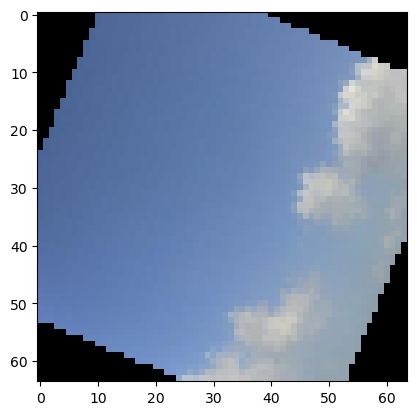

In [19]:
img, label = next(iter(train_dataloader))
print(f"shape of first batch: {img.shape}")
print(f"shape of first batch label: {label.shape}")
print(f"shale of image: {img[0].shape}")
print(f"Plotting the first image:\n{plt.imshow(img[0].permute(1,2,0))}")

In [20]:
train_data.classes, test_data.classes

(['cirriform clouds',
  'clear sky',
  'cumulonimbus clouds',
  'cumulus clouds',
  'high cumuliform clouds',
  'stratiform clouds',
  'stratocumulus clouds'],
 ['cirriform clouds',
  'clear sky',
  'cumulonimbus clouds',
  'cumulus clouds',
  'high cumuliform clouds',
  'stratiform clouds',
  'stratocumulus clouds'])

In [21]:
# Create a function to display images

from typing import Tuple, Dict, List
def display_random_images(dataset:torch.utils.data.Dataset,
                         classes: List[str] = None,
                         n: int=10,
                         display_shape: bool =True,
                         seed: int =None):
    
    # Adjust display if nis too high
    if n >10:
        n=10
        display_shape = False
        print(f"For display, purporses, n should not be larger than 10, setting to 10 and removing shape display")
        
    # set the seed 
    if seed:
        random.seed(seed)
        
    # get random indexes
    random_samples_idx = random.sample(range(len(dataset)),k=n)
    print(random_samples_idx)
    
    plt.figure(figsize= (16,8))
    
    # loop throguh random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    
    # adjust tensor dimensions
        targ_image_adjust = targ_image.permute(1,2,0)
    
        plt.subplot(1, n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)
    
        if classes:
            title = f"class : {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
            
        plt.title(title)

In [22]:
class_names = train_data.classes
class_names

['cirriform clouds',
 'clear sky',
 'cumulonimbus clouds',
 'cumulus clouds',
 'high cumuliform clouds',
 'stratiform clouds',
 'stratocumulus clouds']

[458, 204, 44, 179, 96]


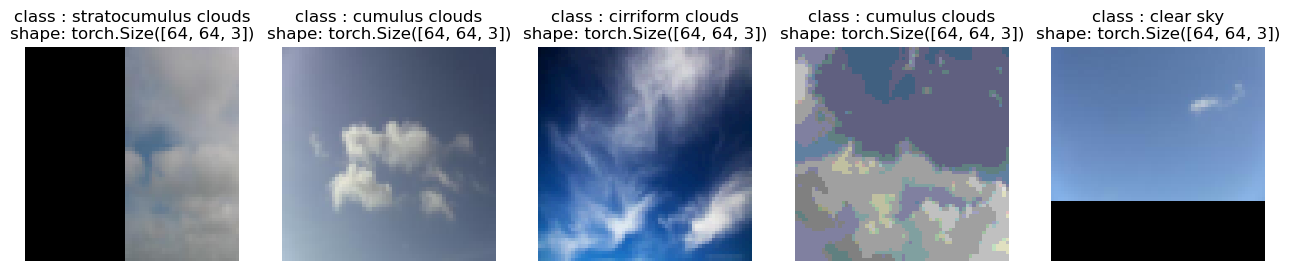

In [23]:
display_random_images(dataset=train_data,n=5,classes = class_names)

[159, 314, 227]


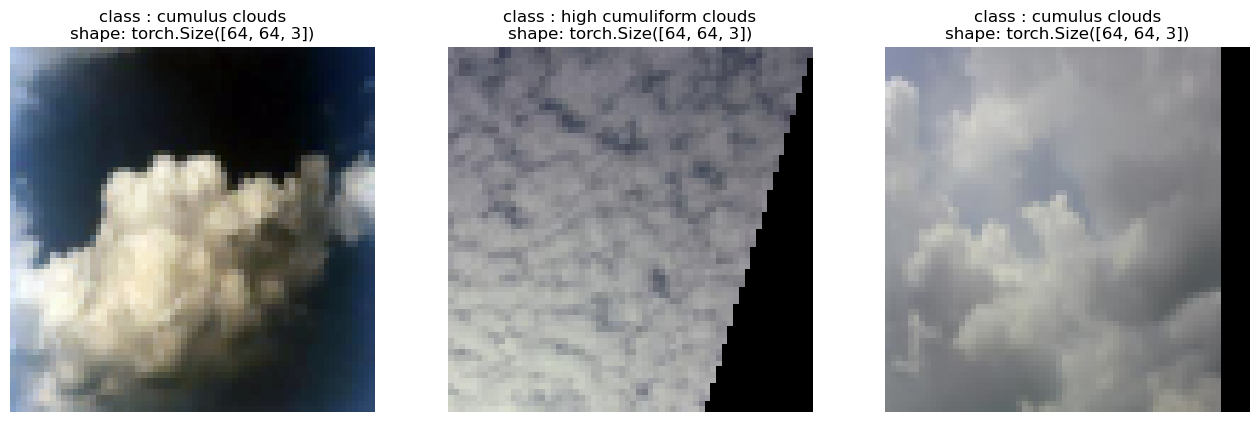

In [24]:
display_random_images(dataset=train_data,n=3,classes = class_names)

In [25]:
class CnnModel(nn.Module):
    def __init__(self,input_shape:int,
                hidden_units:int,
                output_shape:int):
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,
                     stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,
                     stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        
        self.classifier = nn.Sequential(
                nn.Flatten(),
                nn.Linear(in_features=hidden_units * 4*4,
                         out_features=output_shape)
            )
        
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x

In [26]:
model_0 = CnnModel(input_shape=3,hidden_units=10,
                  output_shape=len(class_names))

model_0

CnnModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=7, bias=True)
  )
)

In [27]:
model_0(img)

tensor([[ 7.7090e-02, -4.3115e-02,  8.7334e-02, -8.8612e-05,  1.8313e-02,
         -6.1085e-02,  1.2619e-02]], grad_fn=<AddmmBackward0>)

In [28]:
img.shape

torch.Size([1, 3, 64, 64])

In [29]:
from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
CnnModel                                 [1, 7]                    --
├─Sequential: 1-1                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-3                    [1, 10, 32, 32]           --
│    └─Conv2d: 2-4                       [1, 10, 32, 32]           910
│    └─ReLU: 2-5                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-6                    [1, 10, 16, 16]           --
├─Sequential: 1-2                        [1, 10, 4, 4]             --
│    └─Conv2d: 2-7                       [1, 10, 16, 16]           910
│    └─ReLU: 2-8                         [1, 10, 16, 16]           --
│    └─MaxPool2d: 2-9                    [1, 10, 8, 8]             --
│    └─Conv2d: 2-10                      [1, 10, 8, 8]             910
│    └─ReLU

In [30]:
from torchmetrics import Precision, Recall
from sklearn.metrics import classification_report
metric_recall = Recall(task='multiclass',num_classes=len(class_names),average=None)

In [31]:
# creating train and test loop functions
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device=device):
    
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X) # output logits
        
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)
        
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    
    return train_loss, train_acc


def test_step(model:torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             device = device):
    
    metric_recall = Recall(task='multiclass',num_classes=len(class_names),average=None)
    
    model.eval()
    test_acc , test_loss = 0, 0
    
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits,y)
            test_loss += loss.item()
            
            test_pred_labels = torch.argmax(torch.softmax(test_pred_logits,dim=1),dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)
            
            metric_recall(test_pred_labels,y)
            
        test_loss = test_loss / len(dataloader)
        test_acc = test_acc / len(dataloader)
     
    recall = metric_recall.compute()
    return test_loss, test_acc,recall

In [32]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
         train_dataloader: torch.utils.data.DataLoader,
         test_dataloader: torch.utils.data.DataLoader,
         optimizer :torch.optim.Optimizer,
         loss_fn :torch.nn.Module = nn.CrossEntropyLoss,
         epochs :int = 5,
         device=device):
    
    result = {'train_loss':[],
             'train_acc':[],
              'test_loss':[],
             'test_acc': []}
    
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        
        test_loss, test_acc, test_recall = test_step(model=model,
                                       dataloader=test_dataloader,loss_fn=loss_fn,device=device)
        
        print(f"EPoch: {epoch} | train loss :{train_loss:.4f} train acc: {train_acc:.2f}% | test loss: {test_loss:.4f} | test acc: {test_acc:.2f}%")
        
        
        result['train_loss'].append(train_loss)
        result['train_acc'].append(train_acc)
        result['test_acc'].append(test_acc)
        result['test_loss'].append(test_loss)
        
    print(test_recall)
            
    return result,test_recall

In [33]:
# NUM_EPOCHS = 10
# model_0 = CnnModel(input_shape=3,hidden_units=10,output_shape=len(class_names)).to(device)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)

# model_0_results = train(model= model_0,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,
#                         loss_fn=loss_fn,epochs=NUM_EPOCHS
#                                )

In [34]:
# NUM_EPOCHS = 15
# model_1 = CnnModel(input_shape=3,hidden_units=20,output_shape=len(class_names)).to(device)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

# model_1_results = train(model= model_1,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,
#                         loss_fn=loss_fn,epochs=NUM_EPOCHS
#                                )

In [35]:
# NUM_EPOCHS = 15
# model_3 = CnnModel(input_shape=3,hidden_units=32,output_shape=len(class_names)).to(device)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)

# model_3_results = train(model= model_3,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,
#                         loss_fn=loss_fn,epochs=NUM_EPOCHS
#                                )

In [36]:
# NUM_EPOCHS = 15
# model_4 = CnnModel(input_shape=3,hidden_units=64,output_shape=len(class_names)).to(device)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.01)

# model_4_results = train(model= model_4,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,
#                         loss_fn=loss_fn,epochs=NUM_EPOCHS
#                                )

In [37]:
NUM_EPOCHS = 25
model_5 = CnnModel(input_shape=3,hidden_units=128,output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_5.parameters(), lr=0.01)

model_5_results,recall = train(model= model_5,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,
                        loss_fn=loss_fn,epochs=NUM_EPOCHS
                               )

  0%|          | 0/25 [00:00<?, ?it/s]

EPoch: 0 | train loss :1.8641 train acc: 0.26% | test loss: 1.8386 | test acc: 0.21%
EPoch: 1 | train loss :1.8270 train acc: 0.28% | test loss: 1.8217 | test acc: 0.21%
EPoch: 2 | train loss :1.8041 train acc: 0.28% | test loss: 1.6793 | test acc: 0.26%
EPoch: 3 | train loss :1.7431 train acc: 0.30% | test loss: 1.6033 | test acc: 0.33%
EPoch: 4 | train loss :1.6666 train acc: 0.31% | test loss: 1.6600 | test acc: 0.36%
EPoch: 5 | train loss :1.6256 train acc: 0.39% | test loss: 1.4401 | test acc: 0.43%
EPoch: 6 | train loss :1.5526 train acc: 0.41% | test loss: 1.6045 | test acc: 0.35%
EPoch: 7 | train loss :1.4943 train acc: 0.44% | test loss: 1.2707 | test acc: 0.46%
EPoch: 8 | train loss :1.4207 train acc: 0.43% | test loss: 1.2816 | test acc: 0.49%
EPoch: 9 | train loss :1.4584 train acc: 0.44% | test loss: 1.2717 | test acc: 0.51%
EPoch: 10 | train loss :1.4236 train acc: 0.44% | test loss: 1.1708 | test acc: 0.54%
EPoch: 11 | train loss :1.3384 train acc: 0.53% | test loss: 1.0

In [38]:
# class Net(nn.Module):
#     def __init__(self, num_classes):
#         super().__init__()
#         # Define feature extractor
#         self.feature_extractor = nn.Sequential(
#             nn.Conv2d(3, 32, kernel_size=3, padding=1),
#             nn.ELU(),
#             nn.MaxPool2d(kernel_size=2),
#             nn.Conv2d(32, 64, kernel_size=3, padding=1),
#             nn.ELU(),
#             nn.MaxPool2d(kernel_size=2),
#             nn.Flatten(),
#         )
#         # Define classifier
#         self.classifier = nn.Linear(64*16*16, num_classes)

In [39]:
# import pandas as pd

In [40]:
# pd.DataFrame(model_5_results)

In [41]:
test_data.class_to_idx.items()

dict_items([('cirriform clouds', 0), ('clear sky', 1), ('cumulonimbus clouds', 2), ('cumulus clouds', 3), ('high cumuliform clouds', 4), ('stratiform clouds', 5), ('stratocumulus clouds', 6)])

In [42]:
recall_score_per_class = {
    k: recall[v].item()
    for k, v 
    in test_data.class_to_idx.items()
}

In [43]:
recall_score_per_class.keys()

dict_keys(['cirriform clouds', 'clear sky', 'cumulonimbus clouds', 'cumulus clouds', 'high cumuliform clouds', 'stratiform clouds', 'stratocumulus clouds'])

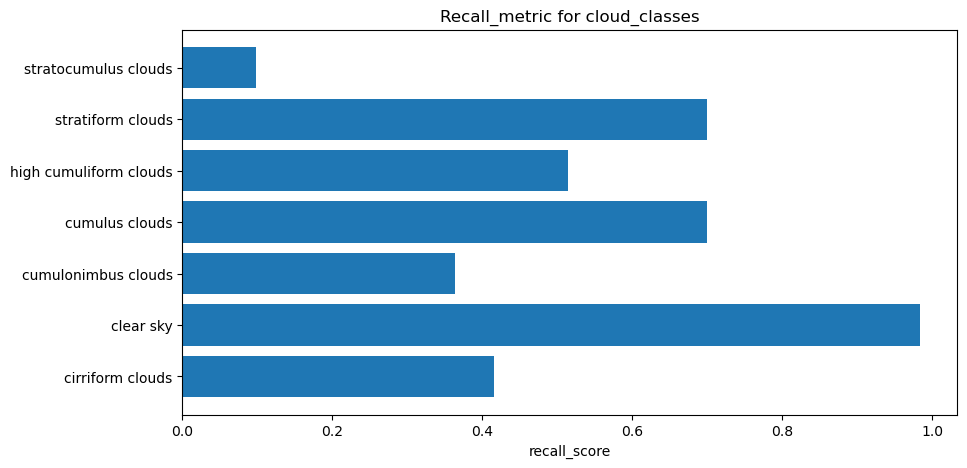

In [44]:
import matplotlib.pyplot as plt
classes = list(recall_score_per_class.keys())
recall = list(recall_score_per_class.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(classes, recall)
plt.xlabel("recall_score")
plt.title("Recall_metric for cloud_classes");

In [45]:
def plot_loss_curves(results: Dict[str,List[float]]):
    """Plot training curves of a result dictionary"""
    
    loss = results['train_loss']
    test_loss = results['test_loss']
    
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']
    
    epochs = range(len(results['train_loss']))
    
    plt.figure(figsize = (15,7))
    
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label = 'train loss')
    plt.plot(epochs, test_loss, label = "test loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label = "traiin accuacy")
    plt.plot(epochs, test_accuracy, label = 'test accuracy')
    plt.title("Accuracy")
    plt.xlabel("EPochs")
    plt.legend()

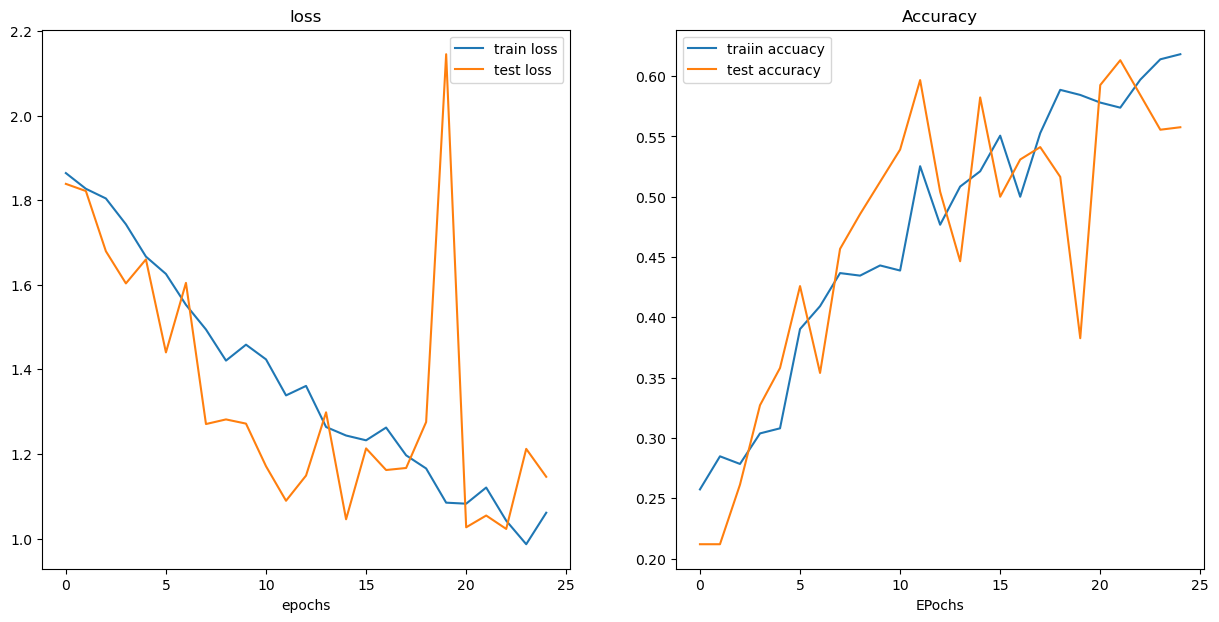

In [46]:
plot_loss_curves(results=model_5_results)